In [197]:
import requests
import json
import pandas as pd

# API Key and Secret

# Base URL
base_url = "https://fapi.binance.com/fapi/v1/"

# Contract and Timeframe
contract = "BNBUSD_CM0628"
contract1="BNBUSD_PERP"
interval = "1m"



# Get Historical Data for Quarterly 0628


In [198]:
import requests
import json
import pandas as pd

# API Key and Secret
api_key = "<key>"
api_secret = "<secret>"

# Base URL
base_url = "https://fapi.binance.com/fapi/v1/"
base_url_spot='https://api.binance.com/api/v3/'

# Contract and Timeframe
contract = "BNBUSD_240927"
contract1="BNBUSD_PERP"
interval = "1d"

# Start and End Time (in milliseconds)
start_time = 1678886400000 - 10 * 24 * 60 * 60 * 1000 # 2023-03-15 00:00:00 UTC
end_time = 1678885500000 + 30 * 24 * 60 * 60 * 1000  # 30 days later

params = {
    "interval": interval,
    "startTime": start_time,
    "endTime": end_time,
    "symbol": "BTCUSDT",
}

response = requests.get(base_url_spot + "klines", params=params)
spot = json.loads(response.text)
# print(spot)

# Get Historical Data for Quarterly 0628
params = {
    "interval": interval,
    "startTime": start_time,
    "endTime": end_time,
    "pair": "BTCUSDT",
}


params['contractType']='CURRENT_QUARTER'
response = requests.get(base_url + "continuousKlines", params=params)
data_0628 = json.loads(response.text)
# print(data_0628)
# Get Historical Data for Perpetual


params['contractType']='PERPETUAL'
response = requests.get(base_url + "continuousKlines", params=params)
data_perpetual = json.loads(response.text)
# print(response.text)
# Convert to Pandas DataFrames
spot=pd.DataFrame(spot, columns=["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "Quote Asset Volume", "Number of Trades", "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore"])
df_0628 = pd.DataFrame(data_0628, columns=["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "Quote Asset Volume", "Number of Trades", "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore"])
df_perpetual = pd.DataFrame(data_perpetual, columns=["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "Quote Asset Volume", "Number of Trades", "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore"])

# Process and analyze the DataFrames as needed

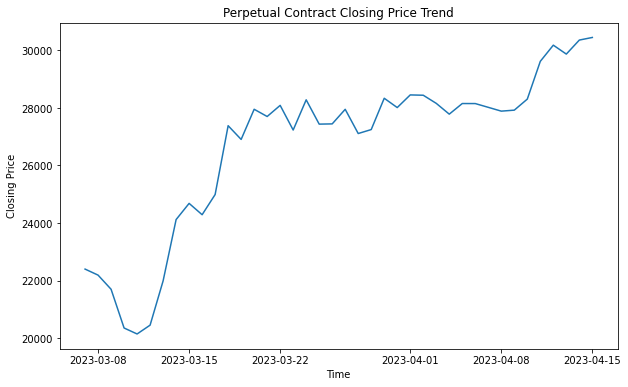

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(pd.to_datetime(df_perpetual["Close Time"], unit="ms"), df_perpetual["Close"].astype("float64"))
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Perpetual Contract Closing Price Trend")
plt.show()


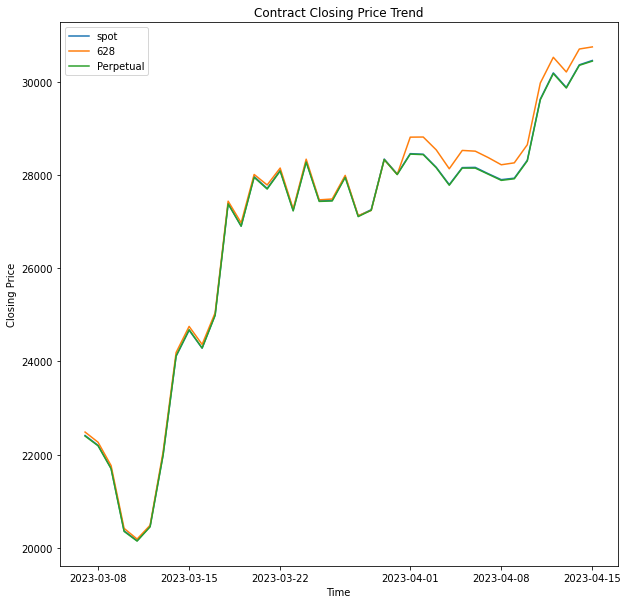

In [200]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.plot(pd.to_datetime(spot["Close Time"], unit="ms"), spot["Close"].astype("float64"),label="spot")
plt.plot(pd.to_datetime(df_0628["Close Time"], unit="ms"), df_0628["Close"].astype("float64"),label="628")
plt.plot(pd.to_datetime(df_perpetual["Close Time"], unit="ms"), df_perpetual["Close"].astype("float64"),label="Perpetual")

plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Contract Closing Price Trend")
plt.legend()

plt.show()

In [201]:
p=df_perpetual["Close"].astype("float64").to_numpy()
c=df_0628["Close"].astype("float64").to_numpy()
gap=c-p



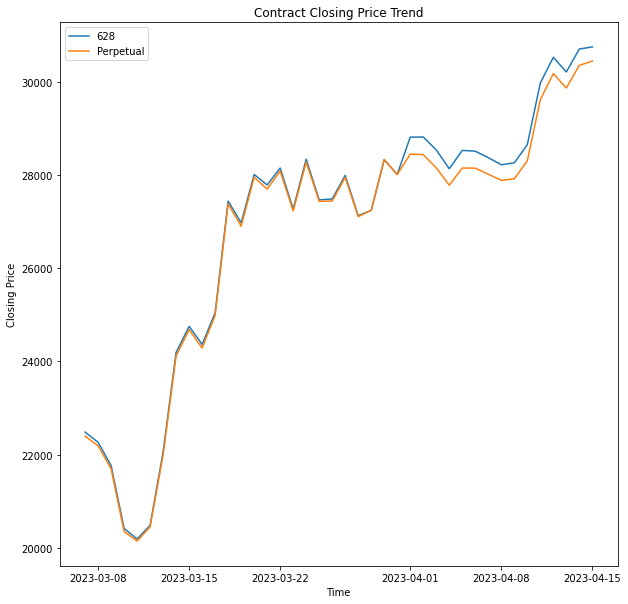

In [202]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

# plt.plot(pd.to_datetime(spot["Close Time"], unit="ms"),gap,label="Gap between 628 and Perpetual")
plt.plot(pd.to_datetime(df_0628["Close Time"], unit="ms"),df_0628["Close"].astype("float64"),label="628")
plt.plot(pd.to_datetime(df_perpetual["Close Time"], unit="ms"), df_perpetual["Close"].astype("float64"),label="Perpetual")

plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Contract Closing Price Trend")
plt.legend()

plt.show()

In [203]:

params = {
    "interval": "1m",
    "startTime": start_time,
    "endTime": end_time,
    "symbol": "BTCUSDT",
    'limit':1000
}


response = requests.get(base_url + "fundingRate", params=params)
fundingrate = json.loads(response.text)
fundingrate_df=pd.DataFrame(fundingrate, columns=["symbol", "fundingTime", "fundingRate", "marketprice"])


In [204]:
response.text

'[{"symbol":"BTCUSDT","fundingTime":1678032000015,"fundingRate":"0.00003706","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678060800007,"fundingRate":"0.00004054","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678089600017,"fundingRate":"0.00005460","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678118400000,"fundingRate":"0.00005414","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678147200009,"fundingRate":"0.00001173","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678176000016,"fundingRate":"0.00004375","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678204800017,"fundingRate":"0.00002631","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678233600000,"fundingRate":"0.00002917","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678262400014,"fundingRate":"0.00003816","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678291200021,"fundingRate":"0.00010000","markPrice":""},{"symbol":"BTCUSDT","fundingTime":1678320000010,"fundingRate":"0.00010000","markPrice":"

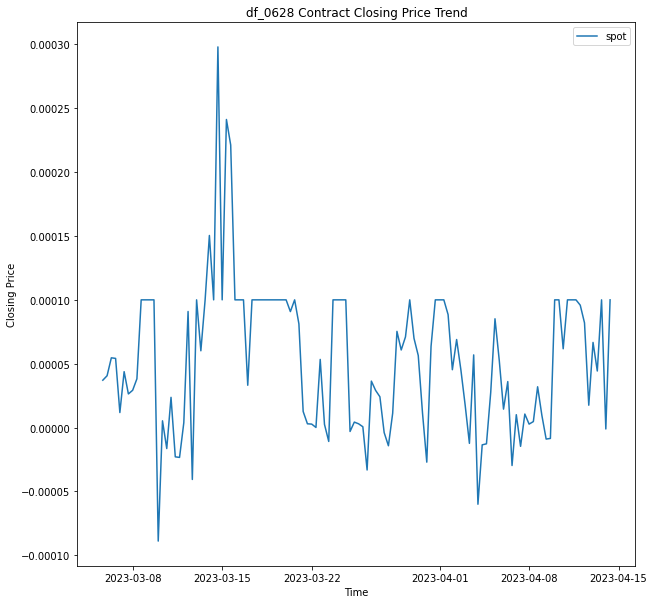

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.plot(pd.to_datetime(fundingrate_df["fundingTime"], unit="ms"), fundingrate_df["fundingRate"].astype("float64"),label="spot")

plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("df_0628 Contract Closing Price Trend")
plt.legend()

plt.show()

In [206]:
from Question2 import implile_interest_Rate
merged_df = pd.merge(df_0628, spot, on='Open Time')
merged_df
# Convert the current_time column to datetime if necessary
merged_df['Close_x']=merged_df['Close_x'].astype("float64")
merged_df['Close_y']=merged_df['Close_y'].astype("float64")
merged_df['current_time'] = pd.to_datetime(merged_df['Open Time'], unit='ms')

merged_df['future_time']=pd.to_datetime(1719504000, unit='s')

# Calculate the time difference in days between current_time and future_time

# Apply the implile_interest_Rate function to calculate the implied interest rate
merged_df['implied_interest_rate'] = merged_df.apply(lambda row: implile_interest_Rate(row['Close_x'], row['Close_y'], row['current_time'],row['future_time']), axis=1)



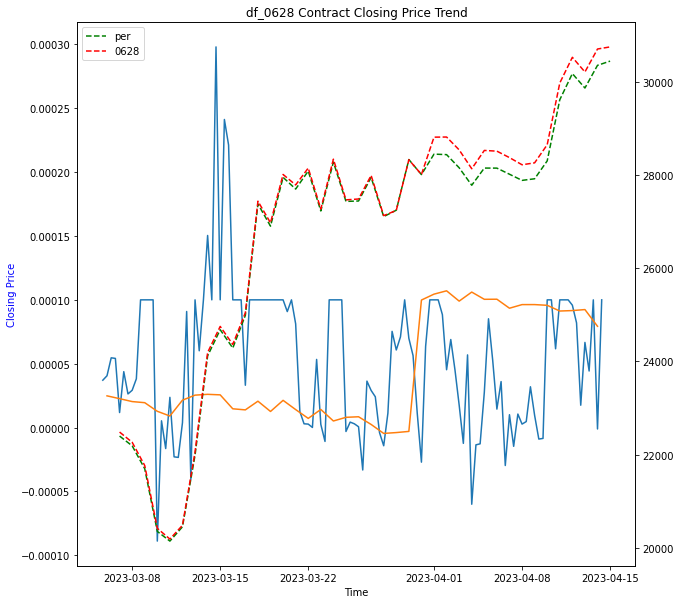

In [208]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (code for loading and preparing df_0628 and df_perpetual)

# Convert timestamps to datetime objects


# Create the figure and primary axes
fig, ax1 = plt.subplots(figsize=(10, 10))

# Plot the price data on the primary axes
ax1.plot(pd.to_datetime(fundingrate_df["fundingTime"], unit="ms"), fundingrate_df["fundingRate"].astype("float64"),label="funding rate")
ax1.plot(pd.to_datetime(merged_df["current_time"], unit="ms"), merged_df["implied_interest_rate"].astype("float64"),label="implied_interest_rate")

# Set the labels and title for the primary axes
ax1.set_xlabel("Time")
ax1.set_ylabel("Closing Price", color="blue")
ax1.set_title("df_0628 Contract Closing Price Trend")

# Create the twin axes for the gap data
ax2 = ax1.twinx()

# Plot the gap data on the twin axes
ax2.plot(pd.to_datetime(df_perpetual["Close Time"], unit="ms"), df_perpetual["Close"].astype("float64"), label="per", color="green", linestyle="--")
ax2.plot(pd.to_datetime(df_0628["Close Time"], unit="ms"), df_0628["Close"].astype("float64"), label="0628", color="red",linestyle="--")
# ax2.plot(pd.to_datetime(df_0628["Close Time"], unit="ms"), df_0628["Close"].astype("float64")-df_perpetual["Close"].astype("float64"), label="0628-per", color="yellow",linestyle="--")


# Set the label and color for the twin axes

# Add a legend and show the plot
plt.legend()
plt.show()

# Question 3

From the previous analysis, we can see that when the implied interest rate from calendar future is greater than the funding rate from the perpetual future, normally the price difference between the futures would increase. 

If the implied funding rate in calendar future > funding rate in perpetual future, short the perpetual future, long calendar future. In this case, we can earn the funding fee. 

